In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

In [3]:
# Display first few rows
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get the data types of the columns.

In [5]:
# Get data types of columns
data.shape

(19382, 12)

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna(axis=0)

Check for and handle duplicates.

In [12]:
# Check class balance
data['claim_status'].value_counts(normalize = True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

approximately 50.3% of the dataset represents claims and 49.7% represents opinions, so the outcome variable is balanced.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [13]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].str.len()
data.head(10)
data['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

Calculate the average text_length for claims and opinions.

In [14]:
# Calculate the average text_length for claims and opinions
data[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

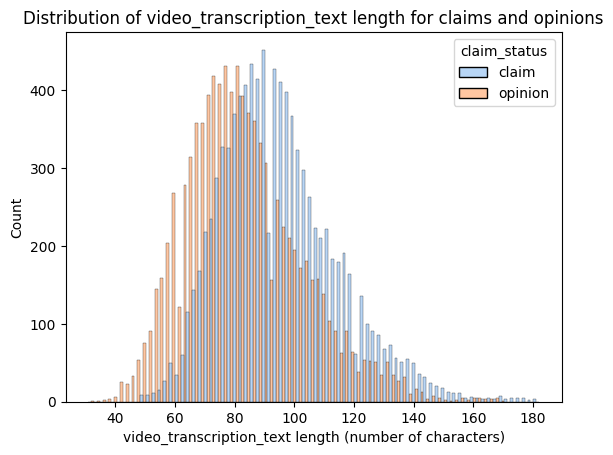

In [15]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
sns.histplot(data=data, stat='count', multiple='dodge', x='text_length', palette='pastel', hue='claim_status')
plt.xlabel('video_transcription_text length (number of characters)')
plt.ylabel('Count')
plt.title('Distribution of video_transcription_text length for claims and opinions')
plt.show()


**Feature selection and transformation**

Encode target and catgorical variables.

In [16]:
# Create a copy of the X data
x = data.copy()
# Drop unnecessary columns
x = x.drop(['#', 'video_id'], axis=1)
# Encode target variable
x['claim_status'] = x['claim_status'].replace({'opinion':0, 'claim':1})
# Dummy encode remaining categorical values
x = pd.get_dummies(x,
                  columns = ['verified_status', 'author_ban_status'],
                  drop_first = True)
x.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [17]:
# Isolate target variable
y= x['claim_status']

Isolate the features.

In [18]:
# Isolate features
x = x.drop(['claim_status'], axis=1)
# Display first few rows of features dataframe
x.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [19]:
# Split the data into training and testing sets
x_tr, x_test, y_tr, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [20]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size = 0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [21]:
# Get shape of each training, validation, and testing set
x_train.shape, x_val.shape, y_train.shape, y_val.shape, x_test.shape, y_test.shape


((11450, 11), (3817, 11), (11450,), (3817,), (3817, 11), (3817,))

### **Task 6. Build models**


- countvectorizer scan through the text in x_train
- fit_transform learns the vocab and transform the text data into a sparse matrix where each row is a document and each column represents an n-gram.
- toarray converts parse matrix into a numpy array
- then pd.dataframe converts the array into a readable dataframe
- count_vec.get_feature_names_out retrieves the actual ngrams into columns names

In [22]:
count_vec = CountVectorizer(ngram_range = (2,3),
                           max_features = 15,
                           stop_words='english')
count_vec

count_data = count_vec.fit_transform(x_train['video_transcription_text']).toarray()
count_data

count_df = pd.DataFrame(data=count_data, columns = count_vec.get_feature_names_out())
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
x_train_final = pd.concat([x_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)
x_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


concatenate x_train and count_df to form the final dataframe for training data
x_train.drop(columns=['video_transcription_text']) drop the original raw text column
then combine with the count_df to get the new dtf

In [24]:
validation_count_data = count_vec.transform(x_val['video_transcription_text']).toarray()
validation_count_data
validation_count_df = pd.DataFrame(data=validation_count_data, columns = count_vec.get_feature_names_out())
validation_count_df.head()
x_val_final = pd.concat([x_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)
x_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


In [25]:
test_count_data = count_vec.transform(x_test['video_transcription_text']).toarray()
test_count_df = pd.DataFrame(data = test_count_data, columns = count_vec.get_feature_names_out())
x_test_final = pd.concat([x_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)
x_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 0)
#create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
            'max_features': [0.3,0.6],
            'max_samples':[0.7],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,3],
            'n_estimators': [75,100,200],
            }
#define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']
# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv=5, refit='recall')

In [27]:
%%time
rf_cv.fit(x_train_final, y_train)

CPU times: user 6min 42s, sys: 710 ms, total: 6min 42s
Wall time: 6min 42s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [28]:
rf_cv.best_score_

0.9948228253467271

In [29]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [30]:
# convert rf_cv to dataframe then retrieve the best
rf_results_df = pd.DataFrame(rf_cv.cv_results_)
rf_results_df['mean_test_precision'][rf_cv.best_index_]

0.9994806638131711

GridSearchCV and RandomizedSearchCV use k-fold cross-validation, meaning:
The model is trained and tested on k different train-test splits.
Each split produces a separate precision score.
The mean_test_precision column in rf_results_df contains the average precision score across all validation folds.

Accuracy is unreliable for imbalanced datasets because:
If 95% of the data belongs to one class, a model predicting everything as that class gets 95% accuracy but is useless.
Precision measures how many predicted positives were actually correct, making it better for:
Detecting rare classes (e.g., fraud detection, spam classification).
Reducing false positives, which is important in cases where false alarms are costly (e.g., medical diagnosis, claim verification).

rf_cv.best_index_ points to the best hyperparameter combination.
mean_test_precision tells us the average precision score across different validation folds for that best model.

In [32]:
#Instantiate XGBoost Classifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)
cv_params = {'max_depth': [4,8,12],
            'min_child_weight': [3,5],
            'learning_rate': [.01, .1],
            'n_estimators': [300, 500]
            }
scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [33]:
%%time
xgb_cv.fit(x_train_final, y_train)

CPU times: user 1min 21s, sys: 1.34 s, total: 1min 22s
Wall time: 42.8 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [34]:
xgb_cv.best_score_
xgb_cv.best_params_
xgb_results_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_results_df['mean_test_precision'][xgb_cv.best_index_]

0.9989540885869099

In [35]:
y_pred = rf_cv.best_estimator_.predict(x_val_final)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [36]:
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

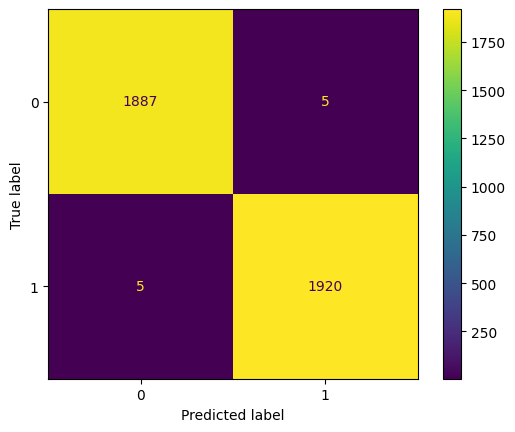

In [37]:
#compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels= None)
log_disp.plot()
plt.show()

In [38]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [39]:
y_pred = xgb_cv.best_estimator_.predict(x_val_final)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

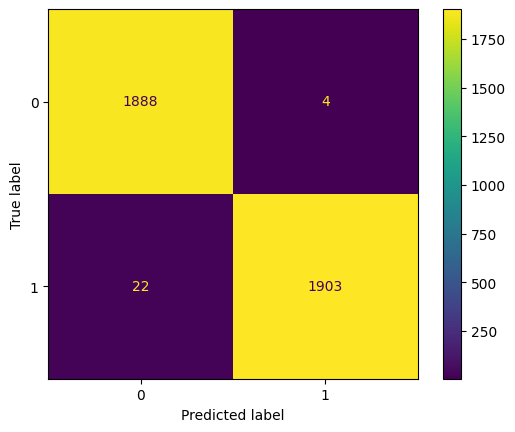

In [40]:
log_cm = confusion_matrix(y_val, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels= None)
log_disp.plot()
plt.show()

In [41]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



return the most important features contributing to the model prediction
extract the best feature then turn it from array to panda series then bar plot it for visualization

# Catboost

In [45]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the CatBoost classifier
cb = CatBoostClassifier(
    objective='Logloss',  # For binary classification
    random_state=0,
    verbose=0  # Suppress training output
)
cv_params = {
    'depth': [4, 8, 12],             # Maximum depth of trees
    'learning_rate': [0.01, 0.1],    # Step size
    'iterations': [300, 500],        # Number of boosting rounds
    'l2_leaf_reg': [3, 5],           # L2 regularization
    'border_count': [32, 64]         # Number of bins for categorical features
}
scoring = ['accuracy', 'precision', 'recall', 'f1']
cb_cv = GridSearchCV(cb, cv_params, scoring = scoring, cv=5, refit = 'recall')

In [46]:
%%time
cb_cv.fit(x_train_final, y_train)

CPU times: user 16min 21s, sys: 46.6 s, total: 17min 8s
Wall time: 9min 34s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fcc6dd6e1a0>,
             param_grid={'border_count': [32, 64], 'depth': [4, 8, 12],
                         'iterations': [300, 500], 'l2_leaf_reg': [3, 5],
                         'learning_rate': [0.01, 0.1]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [47]:
cb_cv.best_score_
cb_cv.best_params_
cb_results_df = pd.DataFrame(cb_cv.cv_results_)
cb_results_df['mean_test_precision'][cb_cv.best_index_]

1.0

In [48]:
y_pred = cb_cv.best_estimator_.predict(x_val_final)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

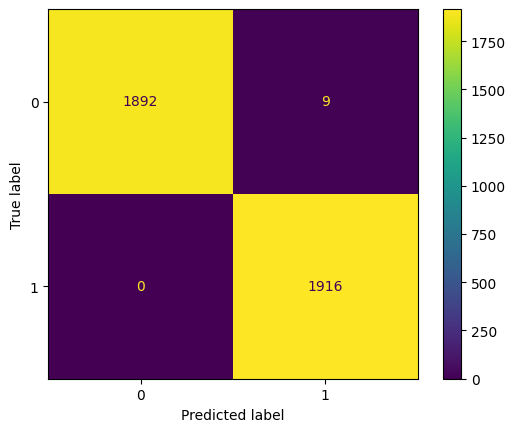

In [49]:
log_cm = confusion_matrix(y_pred, y_val)
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=None)
log_disp.plot()
plt.show()

In [50]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



# SVM 

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [52]:
# kernel = radial basic function, good for non linear problems
# allow
svm = SVC(kernel='rbf', random_state=42)
svm_params = {
    'C': [0.1, 1, 10],           # Regularization parameter (higher = stricter margin)
    'gamma': ['scale', 'auto', 0.01, 0.1],  # Kernel coefficient (for RBF kernel)
    'kernel': ['rbf']             # Using RBF kernel (you can also try 'linear' or 'poly')
}
scoring = ['accuracy', 'precision', 'recall', 'f1']
svm_cv = GridSearchCV(svm, svm_params, scoring = scoring, cv=5, refit = 'recall')

In [53]:
%%time
svm_cv.fit(x_train_final, y_train)

CPU times: user 10min 42s, sys: 4.61 s, total: 10min 47s
Wall time: 10min 47s


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.01, 0.1],
                         'kernel': ['rbf']},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [80]:
svm_cv.best_score_
svm_cv.best_params_
svm_results_df = pd.DataFrame(svm_cv.cv_results_)
svm_results_df['mean_test_precision'][svm_cv.best_index_]

1.0

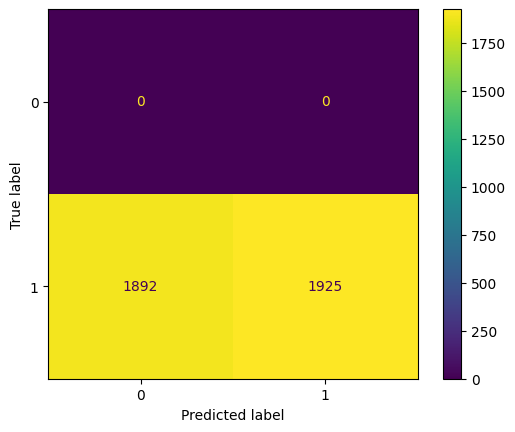

In [55]:
y_pred = svm_cv.best_estimator_.predict(x_val_final)
log_cm = confusion_matrix(y_pred, y_val)
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=None)
log_disp.plot()
plt.show()

# LightGBM

In [65]:
import dask.config

# Enable the new query planning rather than disabling it.
dask.config.set({"dataframe.query-planning": True})

# Now import LightGBM and proceed as usual.
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the LightGBM classifier with a fixed random state.
lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for LightGBM.
lgbm_params = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

scoring = ['accuracy', 'precision', 'recall', 'f1']
lgbm_cv = GridSearchCV(lgbm, lgbm_params, scoring=scoring, cv=5, refit='recall')


In [ ]:
%%time
lgbm_cv.fit(x_train_final, y_train)

In [67]:
lgbm_cv.best_score_
lgbm_cv.best_params_
lgbm_results_df = pd.DataFrame(lgbm_cv.cv_results_)
lgbm_results_df['mean_test_precision'][lgbm_cv.best_index_]

0.999650959860384

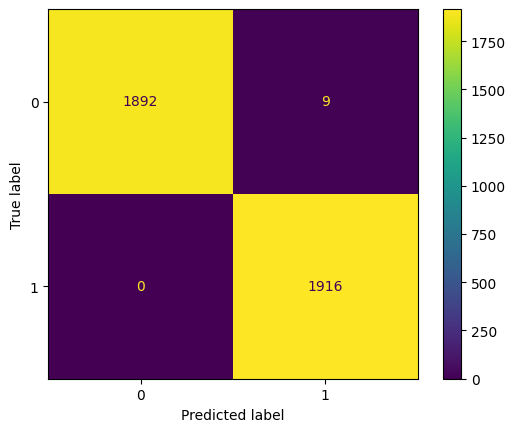

In [68]:
y_pred = lgbm_cv.best_estimator_.predict(x_val_final)
log_cm = confusion_matrix(y_pred, y_val)
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=None)
log_disp.plot()
plt.show()

# ADABoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the AdaBoost classifier.
# By default, AdaBoost uses decision stumps as base estimators.
ada = AdaBoostClassifier(random_state=42)

# Define the parameter grid for AdaBoost.
ada_params = {
    'n_estimators': [50, 100, 200],      # Number of weak learners.
    'learning_rate': [0.01, 0.1, 1, 10]    # Weighting applied to each classifier.
}

# Use the same scoring metrics as before.
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Set up GridSearchCV for AdaBoost.
ada_cv = GridSearchCV(ada, ada_params, scoring=scoring, cv=5, refit='recall')

In [70]:
%%time
ada_cv.fit(x_train_final, y_train)

CPU times: user 1min 21s, sys: 72.5 ms, total: 1min 21s
Wall time: 1min 21s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [71]:
ada_cv.best_score_
ada_cv.best_params_
ada_results_df = pd.DataFrame(ada_cv.cv_results_)
ada_results_df['mean_test_precision'][ada_cv.best_index_]

0.9993067546739585

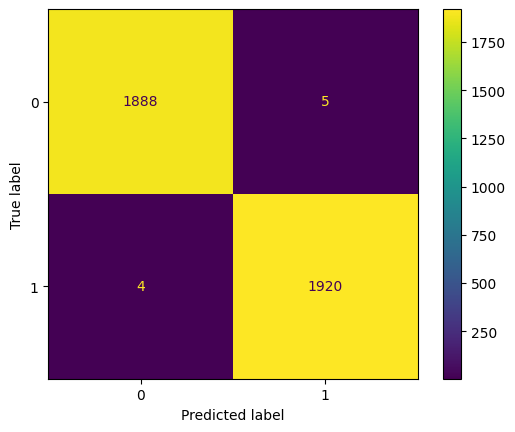

In [72]:
y_pred = ada_cv.best_estimator_.predict(x_val_final)
log_cm = confusion_matrix(y_pred, y_val)
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=None)
log_disp.plot()
plt.show()

In [81]:
# Example: suppose you've obtained the best cross-validation accuracy for each model
rf_accuracy = rf_results_df['mean_test_precision'][rf_cv.best_index_]
xgb_accuracy = xgb_results_df['mean_test_precision'][xgb_cv.best_index_]
cb_accuracy = cb_results_df['mean_test_precision'][cb_cv.best_index_]
svm_accuracy = svm_results_df['mean_test_precision'][svm_cv.best_index_]     # e.g., 0.87
lgbm_accuracy = lgbm_results_df['mean_test_precision'][lgbm_cv.best_index_]      # e.g., 0.90
ada_accuracy = ada_results_df['mean_test_precision'][ada_cv.best_index_]      # e.g., 0.85
# You can add others similarly

# Create a dictionary (or two lists) for the model names and their accuracies:
accuracy_results = {
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy,
    'CatBoost': cb_accuracy,
    'SVM': svm_accuracy,
    'LightGBM': lgbm_accuracy,
    'AdaBoost': ada_accuracy,
    
}


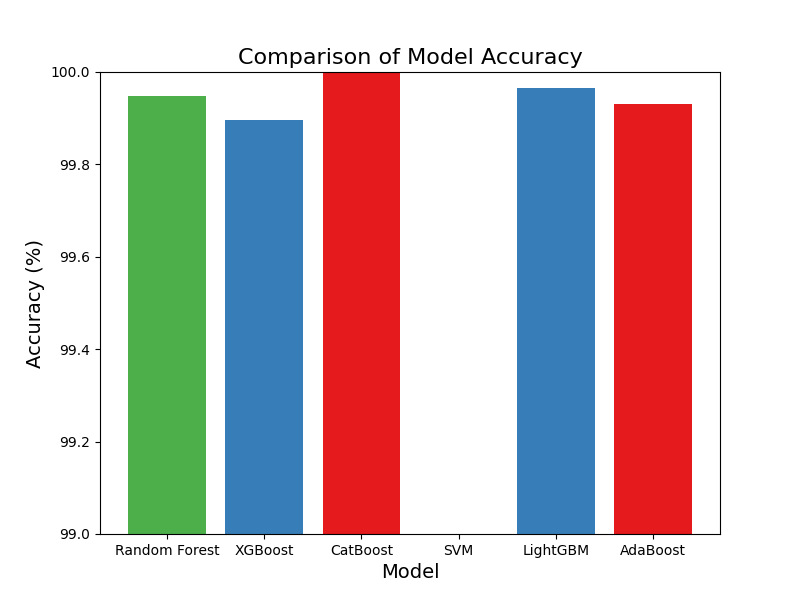

In [86]:
models = list(accuracy_results.keys())
accuracies = [acc * 100 for acc in accuracy_results.values()]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['#4daf4a', '#377eb8', '#e41a1c'])

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Comparison of Model Accuracy', fontsize=16)
plt.ylim(99, 100)  # Limit the y-axis to 90% - 100%

# Annotate each bar with its percentage value.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', 
             ha='center', va='bottom', fontsize=12)

plt.show()

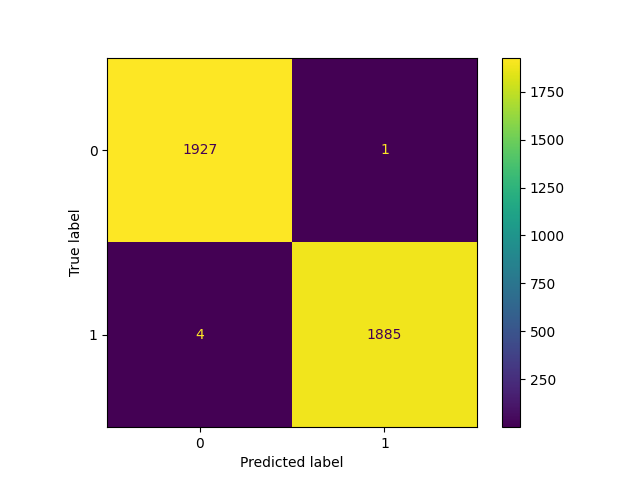

In [87]:
y_pred = cb_cv.best_estimator_.predict(x_test_final)
log_cm = confusion_matrix(y_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels= None)
log_disp.plot()
plt.show()

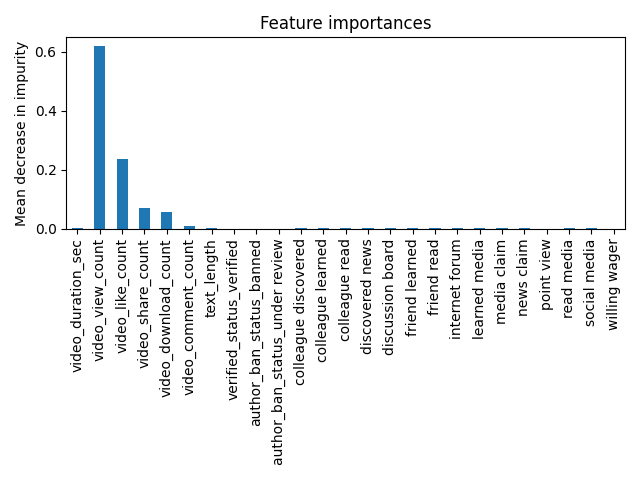

In [88]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()